In [2]:
# Importing Libararies 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go 
import plotly.express as px 
from datetime import date,timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
# Remove Warning 
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("Month_Value_1.csv")
df.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


 the Period Column to Date



In [27]:

# Rename the 'period' column to 'date'
df.rename(columns={'Period': 'Date'}, inplace=True)

# Display the first few rows of the DataFrame to verify the changes
# print(df.head())
df.head()

,Date,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region,Month_Year,FirstDiff,SecondDiff
0,2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0,January 2015,NaN,NaN
1,2015-01-02,1.580759e+07,11636.0,1358.507000,30024676.0,January 2015,-1093.0,-1093.0
2,2015-01-03,2.204715e+07,15922.0,1384.697024,30024676.0,January 2015,4286.0,4286.0
3,2015-01-04,1.881458e+07,15227.0,1235.606705,30024676.0,January 2015,-695.0,-695.0
4,2015-01-05,1.402148e+07,8620.0,1626.621765,30024676.0,January 2015,-6607.0,-6607.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      96 non-null     datetime64[ns]
 1   Revenue                                   96 non-null     float64       
 2   Sales_quantity                            96 non-null     float64       
 3   Average_cost                              96 non-null     float64       
 4   The_average_annual_payroll_of_the_region  96 non-null     float64       
 5   Month_Year                                96 non-null     object        
 6   FirstDiff                                 95 non-null     float64       
 7   SecondDiff                                95 non-null     float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 6.1+ KB


In [29]:
df.shape

(96, 8)

In [30]:
df.describe()

,Date,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region,FirstDiff,SecondDiff
count,96,9.600000e+01,96.000000,96.000000,9.600000e+01,95.000000,95.000000
mean,2018-07-08 00:00:00,3.236045e+07,19197.375000,1695.061159,2.869083e+07,68.088158,68.088158
min,2015-01-01 00:00:00,1.402148e+07,8314.000000,1110.576805,2.740647e+07,-11114.000000,-11114.000000
25%,2016-10-04 06:00:00,2.853894e+07,16702.750000,1605.548321,2.810553e+07,-4523.000000,-4523.000000
50%,2018-07-08 00:00:00,3.236045e+07,19197.375000,1695.061159,2.869083e+07,0.000000,0.000000
75%,2020-04-09 18:00:00,3.587175e+07,20525.250000,1759.132711,2.925338e+07,1598.000000,1598.000000
max,2022-01-12 00:00:00,5.875647e+07,38069.000000,2559.328184,3.002468e+07,16082.000000,16082.000000
std,NaN,9.480197e+06,5367.582289,241.734094,8.609179e+05,6216.860216,6216.860216


In [31]:
df.columns

Index(['Date', 'Revenue', 'Sales_quantity', 'Average_cost',
       'The_average_annual_payroll_of_the_region', 'Month_Year', 'FirstDiff',
       'SecondDiff'],
      dtype='object')

In [32]:
from datetime import date, timedelta

# Get today's date
today = date.today()
end_date = today.strftime('%Y-%m-%d')

# Calculate the start date (365 days ago)
start_date = today - timedelta(days=365)
start_date = start_date.strftime('%Y-%m-%d')

print('The Date starts between:', (start_date, end_date))


The Date starts between: ('2024-04-06', '2025-04-06')


In [34]:
import pandas as pd
import plotly.express as px

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract Month-Year
df['Month_Year'] = df['Date'].dt.to_period('M').dt.to_timestamp()

# Melt the dataframe to long format
df_melted = df.melt(id_vars=['Month_Year'], value_vars=df.columns[1:-1],  # Exclude 'Date' and 'Month_Year'
                    var_name='Category', value_name='Value')

# Create improved line plot
fig = px.line(df_melted, x='Month_Year', y='Value', color='Category',
              markers=True,
              title='Monthly Trend by Category')

# Improve axis labels and formatting
fig.update_layout(xaxis_title='Month-Year',
                  yaxis_title='Value',
                  legend_title='Metric',
                  hovermode='x unified')

# Optional: rotate x-axis ticks if needed
fig.update_xaxes(tickangle=45)

fig.show()


📈 Consistent Yearly Growth (2015–2019):
Revenue exhibited a steady upward trend from $27.79M in 2015 to approximately $58.76M in 2019, more than doubling over this five-year span. This reflects robust business expansion or increased market demand during this period.

⚠️ Sharp Decline in Early 2020:
In January 2020, revenue experienced a significant drop to $40.23M, marking a notable deviation from the previous growth trajectory. This decline could be attributed to early signs of external disruptions, possibly economic shifts or industry-specific downturns.

📊 Trend Summary:
The data reveals a strong upward momentum through 2019, followed by a sudden reversal at the beginning of 2020 — a trend worth further investigation to understand underlying causes.



In [35]:
# Lets Make the stacked plot
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year from the 'Date' column
df['Month_Year'] = df['Date'].dt.strftime('%B %Y')

# Lets Plot the stacked plot using Plotly
fig = px.bar(df, x='Month_Year', y=df.columns[1:], title='Stacked Plot',
             labels={'value': 'Value', 'variable': 'Variables'},
             barmode='stack')

# Update layout
fig.update_layout(xaxis_title='Date', yaxis_title='Value')

# Show the plot
fig.show()


In [36]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Lets Make the Area Plot 
fig=px.area(df, x='Date', y='Sales_quantity', title='Area Plot of Date and Sales_Quantity')
# Update layout
fig.update_layout(xaxis_title='Date', yaxis_title='Sale Quantity')
# Show the plot
fig.show()

📈 Steady Annual Growth:
Sales quantity consistently increased year over year from 2015 to 2019, indicating a positive growth trend in product demand or market expansion.

🔝 Peak in 2019:
In 2015, the highest monthly sales quantity reached approximately 22.11k, rising to around 38.07k by 2019, marking significant progress over the years.

📉 Decline in 2020:
However, in 2020, sales quantity dropped to about 27.18k, suggesting a slowdown possibly due to market conditions, supply chain issues, or external economic factors.

In [38]:
import plotly.express as px

# Optional: Create a 'Year' column for color grouping if not present
df['Year'] = df['Date'].dt.year

# Enhanced scatter plot with marginal box plots and color by Year
fig = px.scatter(
    df,
    x='Sales_quantity',
    y='Average_cost',
    color='Year',  # Adds color differentiation per year
    title='Average Cost vs. Sales Quantity with Trendline and Distribution',
    trendline='ols',
    trendline_color_override='black',
    marginal_x='box',  # Shows boxplot instead of histogram
    marginal_y='box',
    hover_data=['Month_Year']  # Optional: add tooltip context
)

# Update layout for clarity
fig.update_layout(
    xaxis_title='Sales Quantity',
    yaxis_title='Average Cost',
    legend_title='Year',
    hovermode='closest'
)

fig.show()


In [16]:
import plotly.express as px

# Assuming df is your DataFrame containing the specified columns
# Plot the histogram with different colors using Plotly Express
fig = px.histogram(df, x='Date', y='The_average_annual_payroll_of_the_region',
                   title='Histogram of The Average Annual Payroll of the Region by Date',
                   color='Date',  # Assign different colors based on 'Date'
                   template='xgridoff')  # Use a dark background palette


# Update layout
fig.update_layout(xaxis_title='Date', yaxis_title='The Average Annual Payroll of the Region')

# Show the plot
fig.show()


In [39]:
df.isnull().sum()

Date                                        0
Revenue                                     0
Sales_quantity                              0
Average_cost                                0
The_average_annual_payroll_of_the_region    0
Month_Year                                  0
FirstDiff                                   1
SecondDiff                                  1
Year                                        0
dtype: int64

In [40]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
columns_to_impute=['Revenue','Sales_quantity','Average_cost','The_average_annual_payroll_of_the_region']
for column in columns_to_impute:
    df[column]=imputer.fit_transform(df[[column]]).reshape(-1,1)
print('The Data after Imputation:\n', df.isnull().sum())

The Data after Imputation:
 Date                                        0
Revenue                                     0
Sales_quantity                              0
Average_cost                                0
The_average_annual_payroll_of_the_region    0
Month_Year                                  0
FirstDiff                                   1
SecondDiff                                  1
Year                                        0
dtype: int64


In [41]:
# pearsonr Correlation
from scipy.stats import pearsonr
corr,_=pearsonr(df['Sales_quantity'],df['Average_cost'])
print('The pearsonr correlation among Sales_quantity and Average_cost  is:', corr)
from scipy.stats import pearsonr
corr,_=pearsonr(df['Sales_quantity'],df['Revenue'])
print('The pearsonr correlation among Sales_quantity and Revenue  is:', corr)
corr,_=pearsonr(df['Sales_quantity'],df['The_average_annual_payroll_of_the_region'])
print('The pearsonr correlation among Sales_quantity and The_average_annual_payroll_of_the_region  is:', corr)

The pearsonr correlation among Sales_quantity and Average_cost  is: -0.09359855342344763
The pearsonr correlation among Sales_quantity and Revenue  is: 0.8875703852660823
The pearsonr correlation among Sales_quantity and The_average_annual_payroll_of_the_region  is: 0.1037036489067394


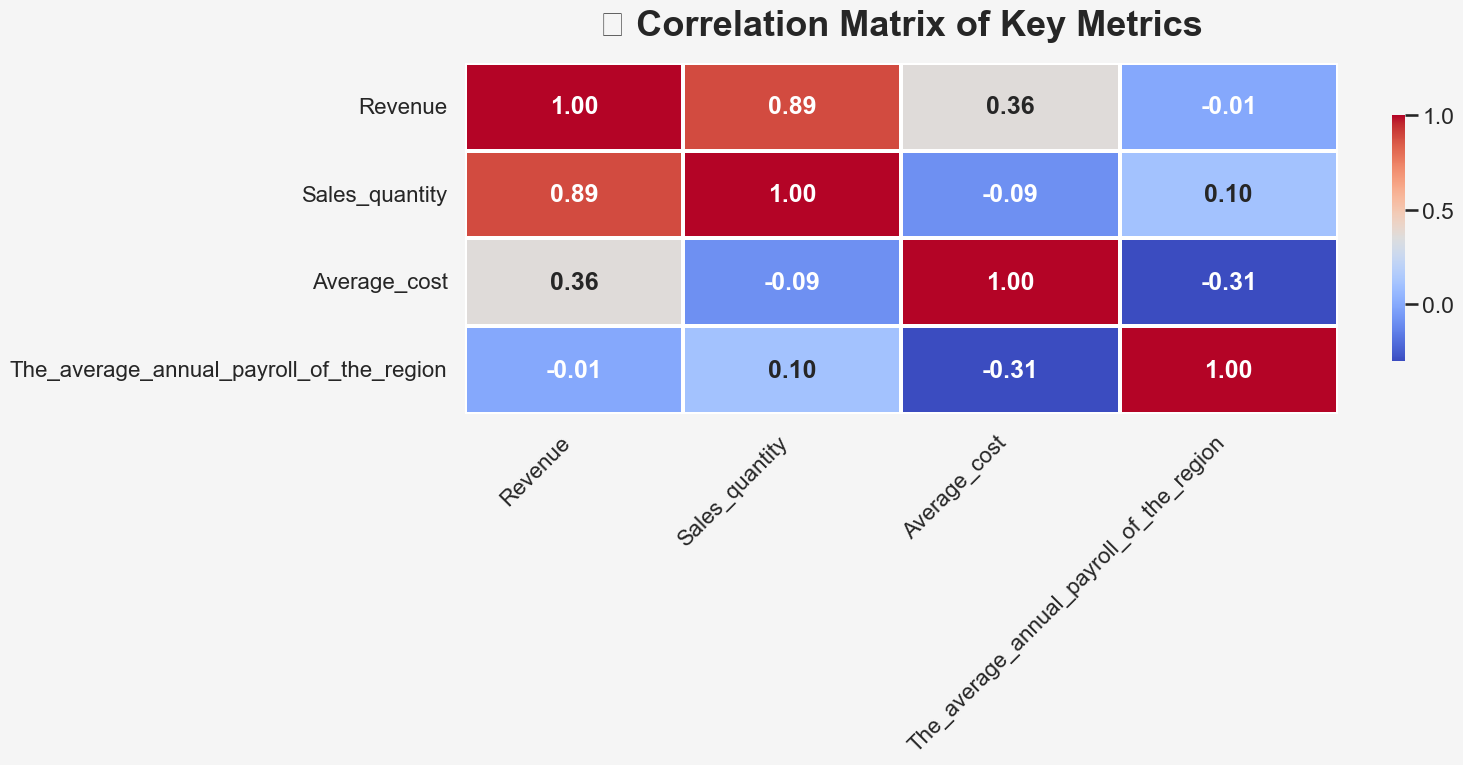

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Optional: Set custom font (use a system font you have, like 'Arial', 'Calibri', etc.)
# plt.rcParams['font.family'] = 'Arial'

# Compute the correlation matrix
corr = df[['Revenue', 'Sales_quantity', 'Average_cost', 'The_average_annual_payroll_of_the_region']].corr()

# Set Seaborn theme
sns.set_theme(style="whitegrid", context="talk")  # 'talk' context gives better sizing for presentation

# Set up the matplotlib figure
plt.figure(figsize=(16, 8))
ax = sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",  # More contrasting than YlGnBu
    linewidths=1.5,
    linecolor='white',
    cbar_kws={"shrink": 0.7},
    annot_kws={"fontsize": 18, "fontweight": "bold"}
)

# Custom title and axis styling
plt.title("📊 Correlation Matrix of Key Metrics", fontsize=26, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(rotation=0, fontsize=16)

# Background and layout adjustments
plt.gcf().set_facecolor('#f5f5f5')  # Subtle off-white background
plt.tight_layout()
plt.show()


>* The Dark colors Represents the high correlation and the light colors represents the low correlation
>* The Sales Quantity and Revenue have high correlation that means as the sales Quantity increases it generates more Revenue

In [44]:
def test_stationarity(df):
    result=adfuller(df)
    print("ADF Statistics %.2f" % result[0])
    print("P value %.2f" % result[0])
    if result[1]<=0.5:
        print('Reject Null Hypothesis, Data is Stationary')
    else:
        print('Fail to Reject Null Hypothesis, Data is not Stationary')
        
test_stationarity(df['Average_cost'])

ADF Statistics -7.19
P value -7.19
Reject Null Hypothesis, Data is Stationary


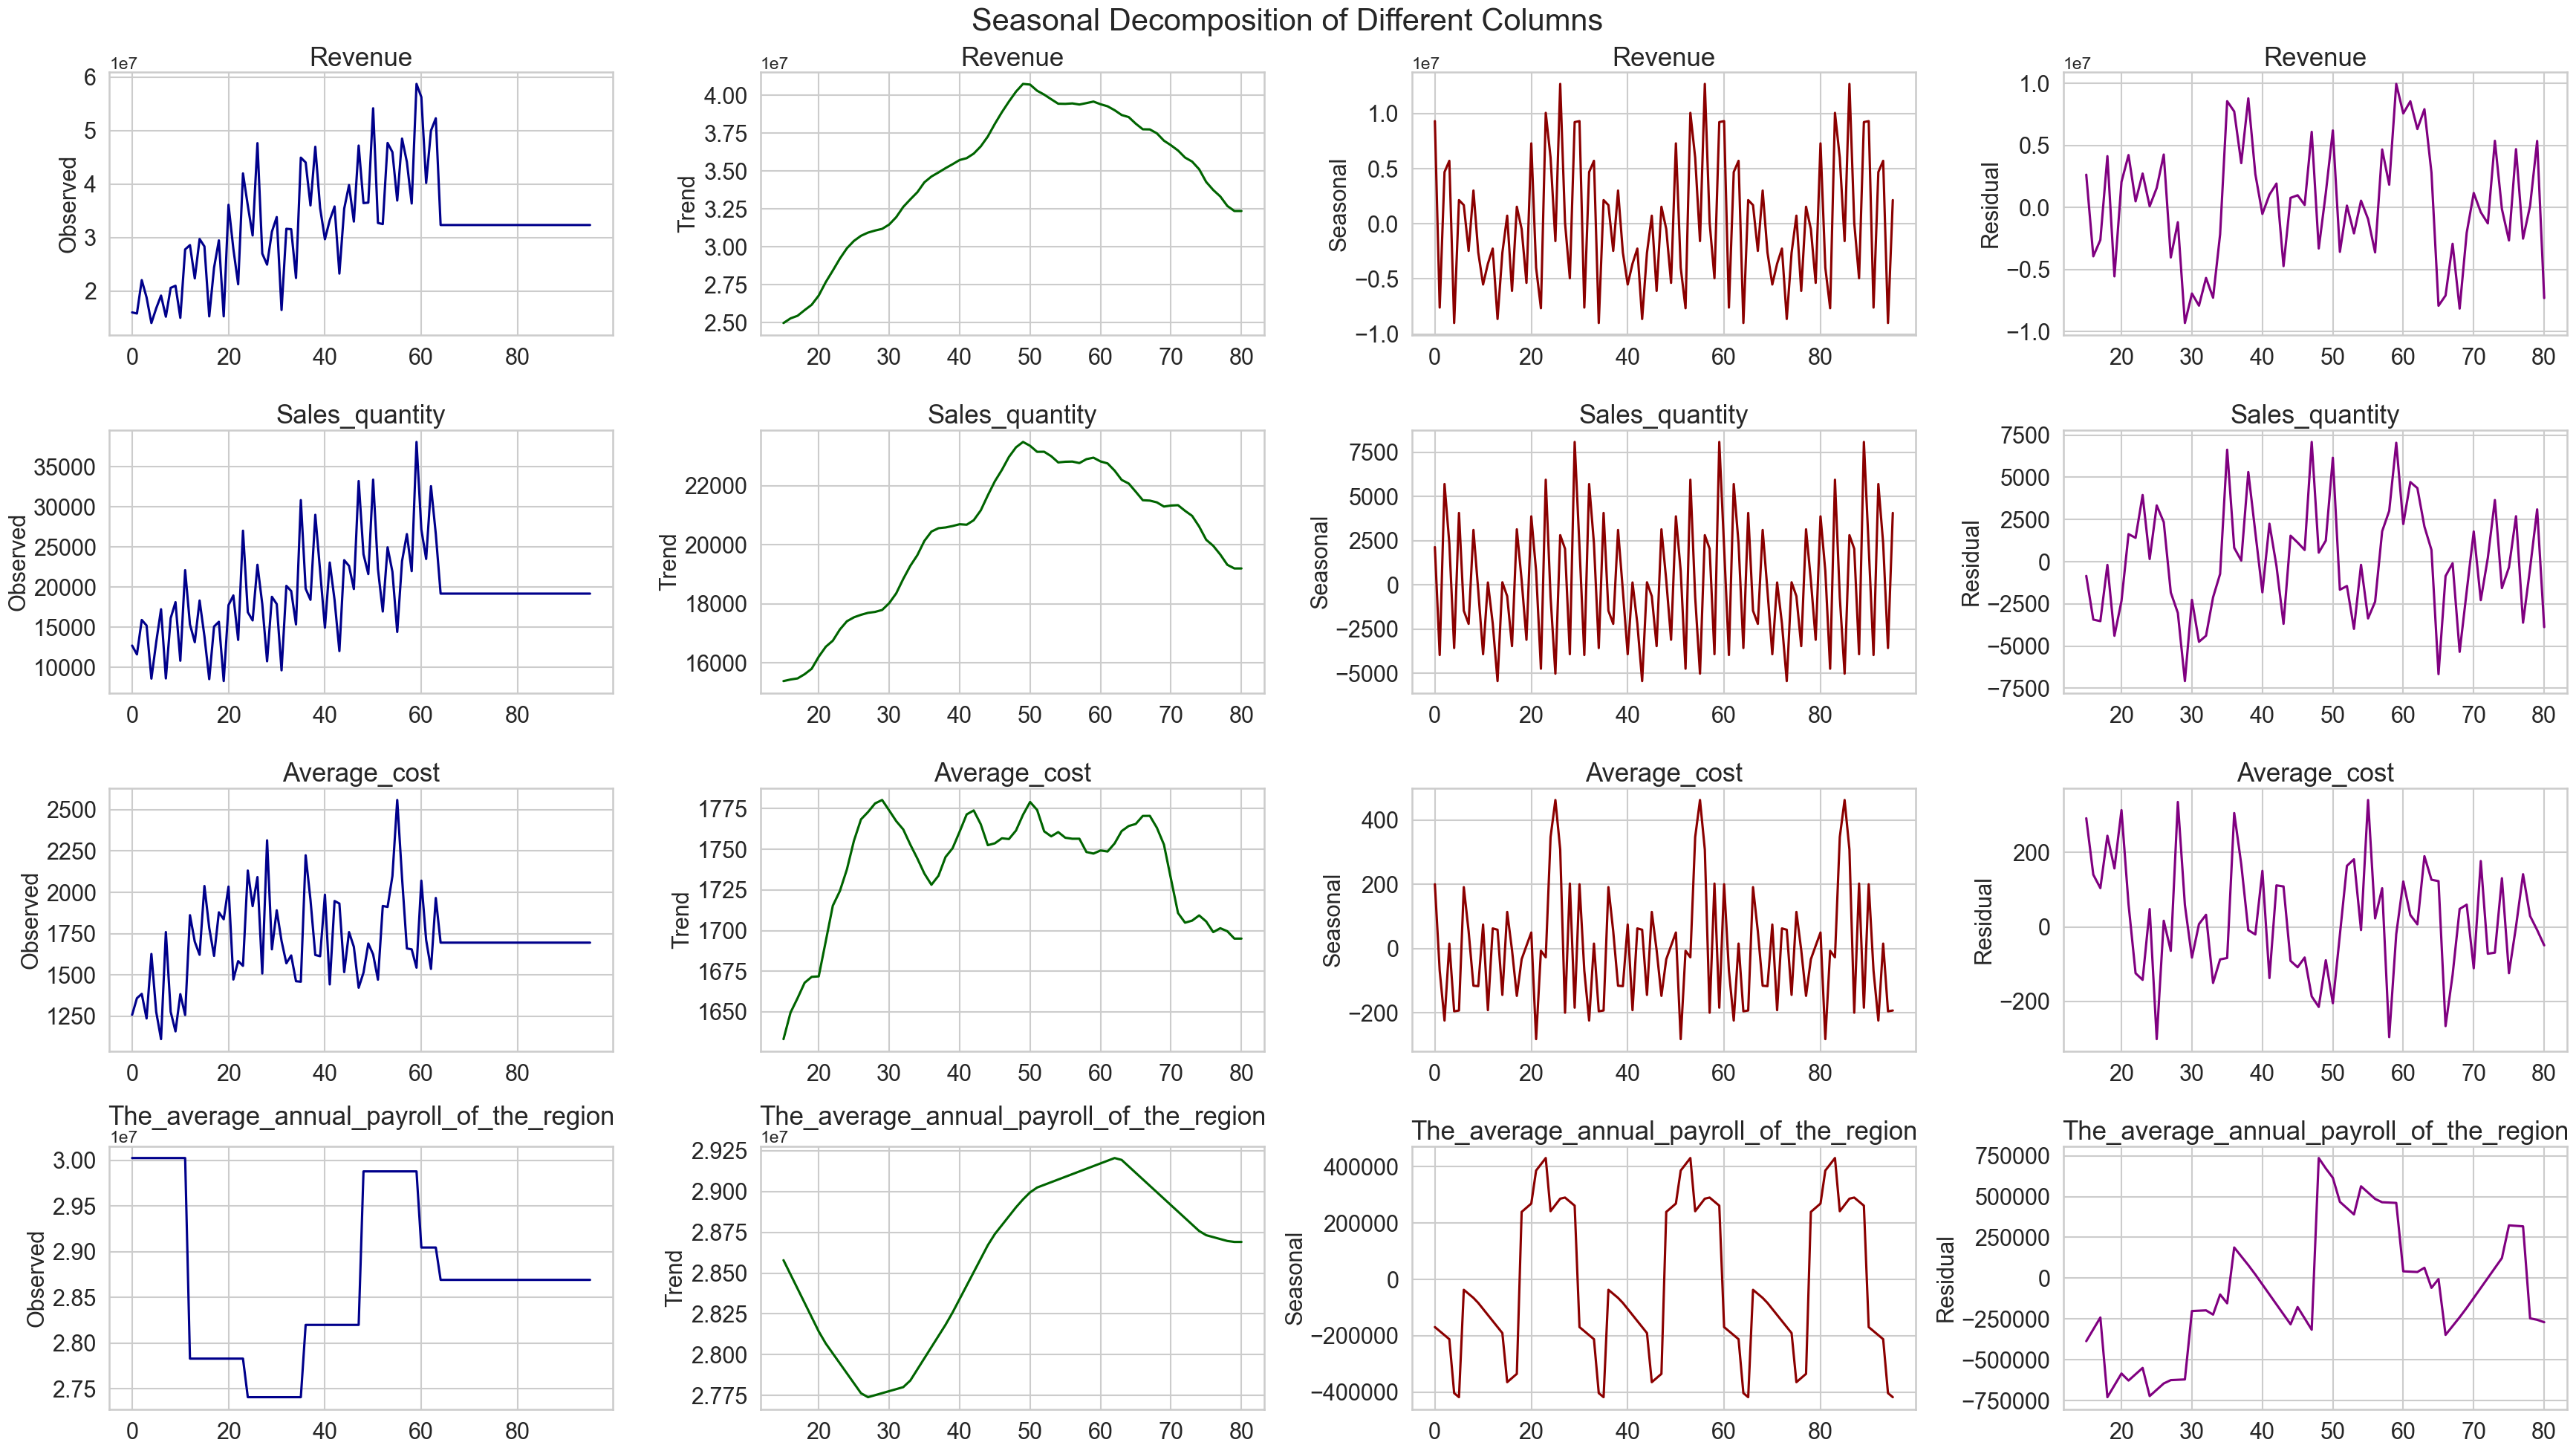

In [45]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Define darker colors using RGB values
colors = [(0, 0, 139), (0, 100, 0), (139, 0, 0), (128, 0, 128)]  # Dark blue, Dark green, Dark red, Dark purple

# Normalize RGB values to range [0, 1]
colors = [(r / 255, g / 255, b / 255) for (r, g, b) in colors]

# Perform seasonal decomposition for each column
columns = ['Revenue', 'Sales_quantity', 'Average_cost', 'The_average_annual_payroll_of_the_region']
fig, axes = plt.subplots(len(columns), 4, figsize=(35, 20))

for i, col in enumerate(columns):
    decompose = seasonal_decompose(df[col], model='additive', period=30)
    
    decompose.observed.plot(ax=axes[i, 0], color=colors[0], fontsize=22)
    axes[i, 0].set_ylabel('Observed', fontsize=22)
    axes[i, 0].set_title(col, fontsize=25)
    
    decompose.trend.plot(ax=axes[i, 1], color=colors[1], fontsize=22)
    axes[i, 1].set_ylabel('Trend', fontsize=22)
    axes[i, 1].set_title(col, fontsize=25)
    
    decompose.seasonal.plot(ax=axes[i, 2], color=colors[2], fontsize=22)
    axes[i, 2].set_ylabel('Seasonal', fontsize=22)
    axes[i, 2].set_title(col, fontsize=25)
    
    decompose.resid.plot(ax=axes[i, 3], color=colors[3], fontsize=22)
    axes[i, 3].set_ylabel('Residual', fontsize=22)
    axes[i, 3].set_title(col, fontsize=25)

# Add main title
fig.suptitle('Seasonal Decomposition of Different Columns', fontsize=30)

plt.tight_layout()
plt.show()


In [47]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# First and second order differences
df['Diff1'] = df['Revenue'].diff()
df['Diff2'] = df['Diff1'].diff()

# Create subplots
fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.07,
    subplot_titles=("Original Revenue", "1st Order Differencing", "2nd Order Differencing")
)

# Original Revenue with trendline
fig.add_trace(go.Scatter(
    x=df['Date'], y=df['Revenue'],
    mode='lines+markers',
    name='Original Revenue',
    line=dict(color='royalblue'),
    marker=dict(size=4),
    hovertemplate='Date: %{x}<br>Revenue: %{y:,.2f}<extra></extra>'
), row=1, col=1)

# 1st Order Differencing
fig.add_trace(go.Scatter(
    x=df['Date'], y=df['Diff1'],
    mode='lines+markers',
    name='1st Diff',
    line=dict(color='orange'),
    marker=dict(size=4),
    hovertemplate='Date: %{x}<br>Diff: %{y:,.2f}<extra></extra>'
), row=2, col=1)

# 2nd Order Differencing
fig.add_trace(go.Scatter(
    x=df['Date'], y=df['Diff2'],
    mode='lines+markers',
    name='2nd Diff',
    line=dict(color='crimson'),
    marker=dict(size=4),
    hovertemplate='Date: %{x}<br>Diff: %{y:,.2f}<extra></extra>'
), row=3, col=1)

# Formatting
fig.update_yaxes(title_text='Revenue ($)', row=1, col=1)
fig.update_yaxes(title_text='1st Difference', zeroline=True, zerolinewidth=2, zerolinecolor='gray', row=2, col=1)
fig.update_yaxes(title_text='2nd Difference', zeroline=True, zerolinewidth=2, zerolinecolor='gray', row=3, col=1)

fig.update_layout(
    title="📉 Revenue Trend & Stationarity Check with Differencing",
    height=900,
    showlegend=False,
    template='plotly_white',
    hovermode='x unified',
    margin=dict(t=80, b=40)
)

fig.show()


In [48]:
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Initialize StandardScaler
scaler = MinMaxScaler()

# Fit the scaler on all numeric columns
scaler.fit(df[numeric_columns])

# Create a new DataFrame to store the scaled values
scaled_df = df.copy()

# Scale each numeric column
scaled_df[numeric_columns] = scaler.transform(df[numeric_columns])

# Display the scaled DataFrame
print(scaled_df)


         Date   Revenue  Sales_quantity  Average_cost  \
0  2015-01-01  0.044453        0.148378      0.101596   
1  2015-01-02  0.039926        0.111645      0.171134   
2  2015-01-03  0.179405        0.255688      0.189211   
3  2015-01-04  0.107144        0.232331      0.086302   
4  2015-01-05  0.000000        0.010284      0.356200   
..        ...       ...             ...           ...   
91 2022-01-08  0.409947        0.365766      0.403440   
92 2022-01-09  0.409947        0.365766      0.403440   
93 2022-01-10  0.409947        0.365766      0.403440   
94 2022-01-11  0.409947        0.365766      0.403440   
95 2022-01-12  0.409947        0.365766      0.403440   

    The_average_annual_payroll_of_the_region    Month_Year  FirstDiff  \
0                                   1.000000  January 2015        NaN   
1                                   1.000000  January 2015   0.368473   
2                                   1.000000  January 2015   0.566260   
3                      

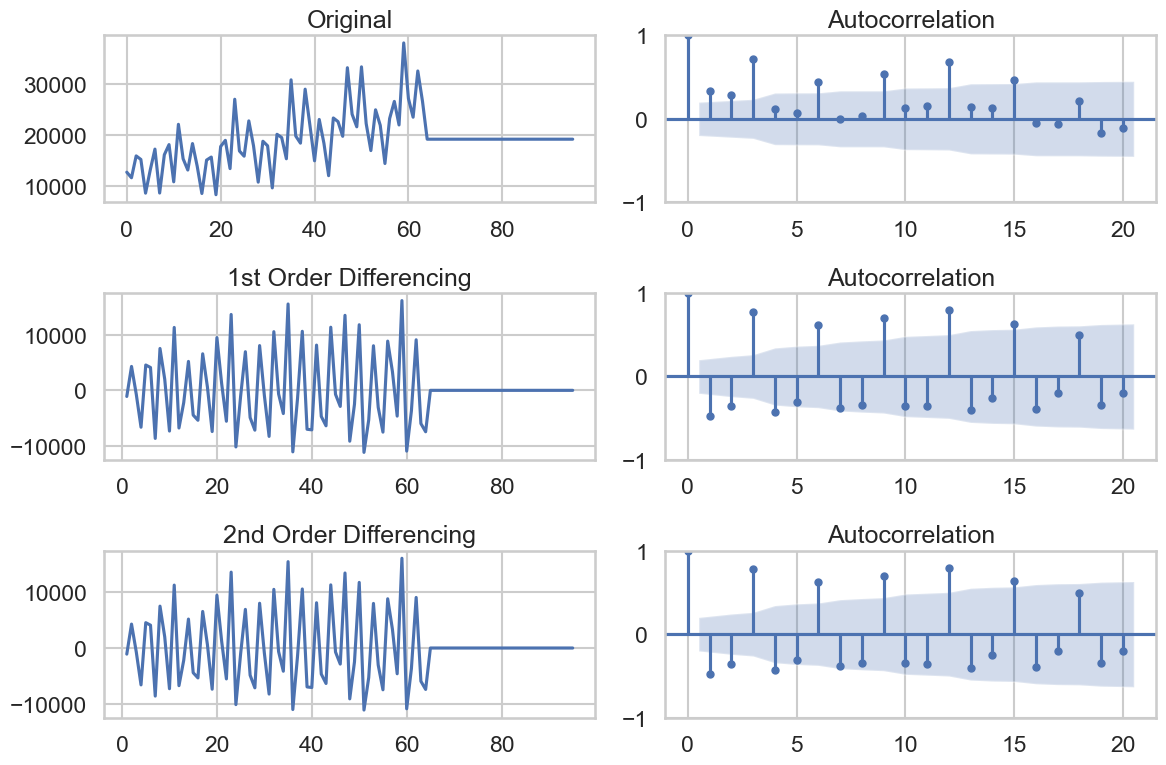

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Assuming you have a pandas DataFrame called 'data' with the stock market dataset
# and it has a column named 'Close' containing the closing prices

# Calculate the first-order and second-order differences
df['FirstDiff'] = df['Sales_quantity'].diff()
df['SecondDiff'] = df['Sales_quantity'].diff()

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

# Plot original data and its autocorrelation
axes[0, 0].plot(df['Sales_quantity'])
axes[0, 0].set_title('Original')
plot_acf(df['Sales_quantity'], ax=axes[0, 1])

# Plot first-order differencing and its autocorrelation
axes[1, 0].plot(df['FirstDiff'])
axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['FirstDiff'].dropna(), ax=axes[1, 1])

# Plot second-order differencing and its autocorrelation
axes[2, 0].plot(df['SecondDiff'])
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['SecondDiff'].dropna(), ax=axes[2, 1])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

`So, After plotting these plots it have been seen that d=1`


## **Lets Find the `P` value**

In [50]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf, pacf
x_acf=pd.DataFrame(acf(df['Sales_quantity']))
print(x_acf)

           0
0   1.000000
1   0.328596
2   0.281196
3   0.714821
4   0.116062
5   0.068448
6   0.439695
7  -0.002904
8   0.035408
9   0.542569
10  0.123895
11  0.151036
12  0.678909
13  0.136546
14  0.123980
15  0.460957
16 -0.049980
17 -0.058747
18  0.212262
19 -0.171552


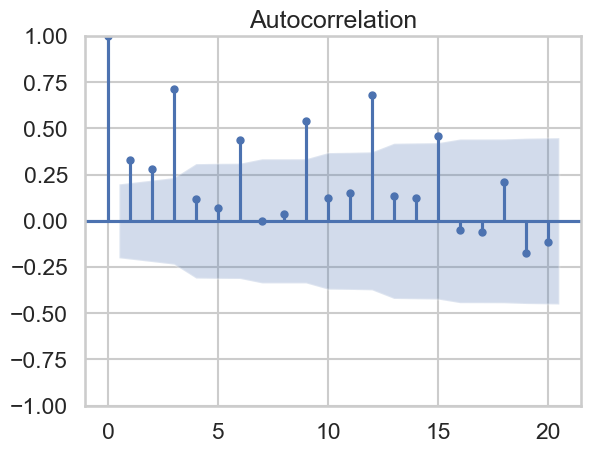

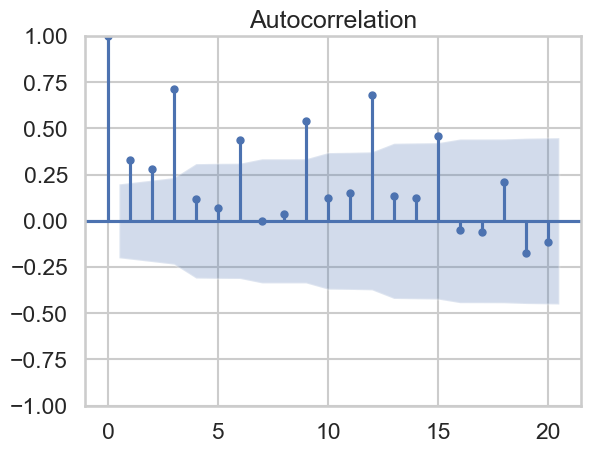

In [51]:
plot_acf(df['Sales_quantity'], alpha=0.05)

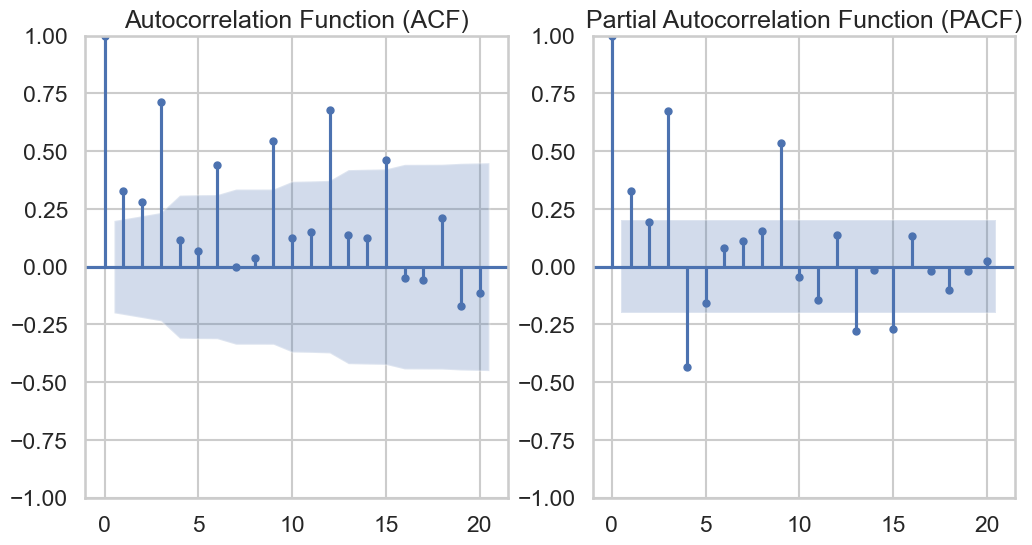

Suggested p (AR): 4
Suggested q (MA): 7
Ljung-Box test p-value: l
AIC: 1826.8623055569524
BIC: 1860.1988320460343
Mean Squared Error (MSE): 3181289.1883778614


In [52]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming you have your time series data in a DataFrame 'df' with a column named 'Sales_quantity'
# df = pd.read_csv('your_data.csv')

# Compute ACF and PACF
x_acf = pd.DataFrame(acf(df['Sales_quantity']))
x_pacf = pd.DataFrame(pacf(df['Sales_quantity']))

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Sales_quantity'], ax=plt.gca(), alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.subplot(122)
plot_pacf(df['Sales_quantity'], ax=plt.gca(), alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Identify p from PACF and q from ACF
p = np.where(x_pacf.values.flatten() < 0.05)[0][0]
q = np.where(x_acf.values.flatten() < 0.05)[0][0]

print(f'Suggested p (AR): {p}')
print(f'Suggested q (MA): {q}')

# Fit ARIMA model with suggested p and q
model = ARIMA(df['Sales_quantity'], order=(p, 0, q))
result = model.fit()

# Ljung-Box test for residual autocorrelation
residuals = result.resid
lb_test_stat, lb_p_value = acorr_ljungbox(residuals, lags=[20])  # Adjust lags as needed
print(f'Ljung-Box test p-value: {lb_p_value[0]}')

# You can also check AIC and BIC
print(f'AIC: {result.aic}')
print(f'BIC: {result.bic}')

# Optionally, you can perform cross-validation to assess model performance
# Split data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df['Sales_quantity'][:train_size], df['Sales_quantity'][train_size:]

# Fit ARIMA model on training data
model = ARIMA(train, order=(p, 0, q))
fitted_model = model.fit()

# Make predictions on test data
forecast = fitted_model.forecast(steps=len(test))

# Calculate mean squared error
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error (MSE): {mse}')


In [54]:
from pmdarima.arima import auto_arima
model= auto_arima(df['Sales_quantity'], start_p=0, 
                  start_q=0, max_p=1, max_q=1, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1595.574, Time=0.21 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1593.630, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1588.289, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1580.756, Time=0.06 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1578.888, Time=0.03 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1580.758, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.71 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1580.698, Time=0.06 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1586.289, Time=0.01 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=1580.827, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,1,0)[12]          
Total fit time: 1.314 seconds


In [55]:
print(model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -787.444
Date:                             Sun, 06 Apr 2025   AIC                           1578.888
Time:                                     15:57:41   BIC                           1583.726
Sample:                                          0   HQIC                          1580.832
                                              - 96                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4498      0.084     -5.347      0.000      -0.615      -0.285
sigma2      1.088e+07   9.2

In [56]:
from pmdarima.arima import auto_arima
model=auto_arima(df['Sales_quantity'], seasonal=True, supress_warnings=True)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   96
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -908.669
Date:                Sun, 06 Apr 2025   AIC                           1827.339
Time:                        15:57:46   BIC                           1840.108
Sample:                             0   HQIC                          1832.499
                                 - 96                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9771      0.034    -28.913      0.000      -1.043      -0.911
ar.L2         -0.9359      0.026    -36.180      0.000      -0.987      -0.885
ma.L1          0.6244      0.097      6.421      0.0

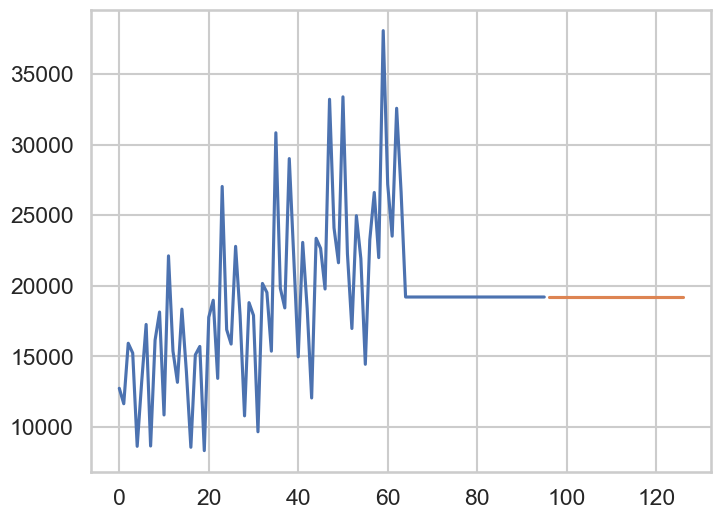

In [57]:
from statsmodels.tsa.arima.model import ARIMA
p,d,q=0,1,0
model=ARIMA(df['Sales_quantity'], order=(p,d,q))
model=model.fit()
forecast=model.predict(len(df['Sales_quantity']), len(df['Sales_quantity'])+30)
# plot the model
plt.figure(figsize=(8,6))
plt.plot(df['Sales_quantity'], label='Actual')
plt.plot(forecast, label='Predicted')
plt.show()

In [58]:
# Rename the column
df=df.rename(columns={'Date':'ds','Revenue':'y'})
df.head()

,ds,y,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region,Month_Year,FirstDiff,SecondDiff,Year,Diff1,Diff2
0,2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0,January 2015,NaN,NaN,2015,NaN,NaN
1,2015-01-02,1.580759e+07,11636.0,1358.507000,30024676.0,January 2015,-1093.0,-1093.0,2015,-2.024847e+05,NaN
2,2015-01-03,2.204715e+07,15922.0,1384.697024,30024676.0,January 2015,4286.0,4286.0,2015,6.239559e+06,6.442043e+06
3,2015-01-04,1.881458e+07,15227.0,1235.606705,30024676.0,January 2015,-695.0,-695.0,2015,-3.232563e+06,-9.472121e+06
4,2015-01-05,1.402148e+07,8620.0,1626.621765,30024676.0,January 2015,-6607.0,-6607.0,2015,-4.793104e+06,-1.560541e+06


In [62]:
from prophet import Prophet
from prophet.plot import plot_plotly
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'ds' is your date column and 'y' is your target variable column
# If not, replace 'ds' and 'y' with your actual date and target column names
df = df.rename(columns={'Date': 'ds', 'Revenue': 'y'})  # Rename columns if needed

# 1. Reset the index to ensure unique labels
df.reset_index(inplace=True, drop=True)

# 2. Check for required columns
required_columns = ['ds', 'y']
if not all(col in df.columns for col in required_columns):
    raise ValueError('Dataframe must have columns "ds" and "y" with the dates and values respectively.')

# 3. Check for missing values in 'ds' and 'y' columns
if df['ds'].isnull().any() or df['y'].isnull().any():
    raise ValueError('Dataframe contains missing values in "ds" or "y" columns.')

# Initialize Prophet model
prophet_model = Prophet()

# Fit the model
prophet_model.fit(df)

# Make future dataframe
future = prophet_model.make_future_dataframe(periods=365)

# Predict
forecast = prophet_model.predict(future)

# Plot the forecast
fig = plot_plotly(prophet_model, forecast)
fig.show()


15:58:31 - cmdstanpy - INFO - Chain [1] start processing
15:58:32 - cmdstanpy - INFO - Chain [1] done processing


In [63]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,7.997344e+06,1.692619e+07,3.338370e+07,7.997344e+06,7.997344e+06,1.767010e+07,1.767010e+07,1.767010e+07,9.980862e+05,9.980862e+05,9.980862e+05,1.667201e+07,1.667201e+07,1.667201e+07,0.0,0.0,0.0,2.566744e+07
1,2015-01-02,8.009226e+06,1.539380e+07,3.043605e+07,8.009226e+06,8.009226e+06,1.492762e+07,1.492762e+07,1.492762e+07,-1.190044e+06,-1.190044e+06,-1.190044e+06,1.611766e+07,1.611766e+07,1.611766e+07,0.0,0.0,0.0,2.293684e+07
2,2015-01-03,8.021108e+06,1.695138e+07,3.306024e+07,8.021108e+06,8.021108e+06,1.689927e+07,1.689927e+07,1.689927e+07,1.658336e+06,1.658336e+06,1.658336e+06,1.524093e+07,1.524093e+07,1.524093e+07,0.0,0.0,0.0,2.492038e+07
3,2015-01-04,8.032990e+06,1.277389e+07,2.877550e+07,8.032990e+06,8.032990e+06,1.266847e+07,1.266847e+07,1.266847e+07,-1.499846e+06,-1.499846e+06,-1.499846e+06,1.416831e+07,1.416831e+07,1.416831e+07,0.0,0.0,0.0,2.070146e+07
4,2015-01-05,8.044871e+06,1.167981e+07,2.802092e+07,8.044871e+06,8.044871e+06,1.202286e+07,1.202286e+07,1.202286e+07,-1.022767e+06,-1.022767e+06,-1.022767e+06,1.304562e+07,1.304562e+07,1.304562e+07,0.0,0.0,0.0,2.006773e+07


In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
y_true=df['y']
y_pred=forecast['yhat'][:len(df)]
print("Mean Squared Error:", mean_squared_error(y_true, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_true, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_true, y_pred)))


Mean Squared Error: 39083532059510.53
Mean Absolute Error: 4947268.595211665
Root Mean Squared Error: 6251682.33833986


In [65]:
from prophet.diagnostics import cross_validation
# Include lagged variables as additional features
df['lag_1'] = df['y'].shift(1)
df['lag_2'] = df['y'].shift(2)

# Include rolling statistics as additional features 
rolling_window = 7  # Adjust the rolling window size 
df['rolling_mean'] = df['y'].rolling(window=rolling_window).mean()
df['rolling_std'] = df['y'].rolling(window=rolling_window).std()

# Normalize the target variable
y_mean = df['y'].mean()
y_std = df['y'].std()
df['y_normalized'] = (df['y'] - y_mean) / y_std

# Initialize Prophet model with adjusted hyperparameters
prophet_model1 = Prophet(
    changepoint_prior_scale=0.5,  # Adjust the changepoint prior scale
    seasonality_prior_scale=10.0,  # Adjust the seasonality prior scale
    yearly_seasonality=True,  # Add yearly seasonality
    weekly_seasonality=True,  # Add weekly seasonality
    daily_seasonality=False,  # No daily seasonality
    seasonality_mode='multiplicative',  # Adjust seasonality mode
)

# Fit the model
prophet_model1.fit(df)

# Make future dataframe
future = prophet_model1.make_future_dataframe(periods=365)

# Predict
forecast = prophet_model1.predict(future)

# Calculate predictions' absolute values
forecast['yhat'] = forecast['yhat'] * y_std + y_mean

# Plot the forecast
fig = plot_plotly(prophet_model1, forecast)
fig.show()

# Evaluate model performance
y_true = df['y'] * y_std + y_mean
y_pred = forecast['yhat'][:len(df)]
print("Mean Squared Error:", mean_squared_error(y_true, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_true, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_true, y_pred)))


# Further Improvements
# Perform Hyperparameter Tuning
# Example:
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5, 1.0],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0, 100.0]
}

# Perform cross-validation with different parameter combinations
cv_results = cross_validation(prophet_model, initial='730 days', period='180 days', horizon='365 days')

15:58:47 - cmdstanpy - INFO - Chain [1] start processing
15:58:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 3.0978817623002794e+27
Mean Absolute Error: 43542471143751.68
Root Mean Squared Error: 55658618041596.03


  0%|          | 0/9 [00:00<?, ?it/s]

15:58:48 - cmdstanpy - INFO - Chain [1] start processing
15:58:48 - cmdstanpy - INFO - Chain [1] done processing
15:58:48 - cmdstanpy - INFO - Chain [1] start processing
15:58:48 - cmdstanpy - INFO - Chain [1] done processing
15:58:48 - cmdstanpy - INFO - Chain [1] start processing
15:58:48 - cmdstanpy - INFO - Chain [1] done processing
15:58:48 - cmdstanpy - INFO - Chain [1] start processing
15:58:49 - cmdstanpy - INFO - Chain [1] done processing
15:58:49 - cmdstanpy - INFO - Chain [1] start processing
15:58:49 - cmdstanpy - INFO - Chain [1] done processing
15:58:49 - cmdstanpy - INFO - Chain [1] start processing
15:58:49 - cmdstanpy - INFO - Chain [1] done processing
15:58:49 - cmdstanpy - INFO - Chain [1] start processing
15:58:49 - cmdstanpy - INFO - Chain [1] done processing
15:58:49 - cmdstanpy - INFO - Chain [1] start processing
15:58:50 - cmdstanpy - INFO - Chain [1] done processing
15:58:50 - cmdstanpy - INFO - Chain [1] start processing
15:58:50 - cmdstanpy - INFO - Chain [1]

In [71]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Ensure 'ds' column in forecast is datetime
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Create interactive plot
fig = go.Figure()

# Plot actual values
fig.add_trace(go.Scatter(
    x=prophet_model1.history['ds'],
    y=prophet_model1.history['y'],
    mode='lines+markers',
    name='Actual',
    line=dict(color='royalblue')
))

# Plot forecast
fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat'],
    mode='lines',
    name='Forecast',
    line=dict(color='orange')
))

# Plot uncertainty intervals
fig.add_trace(go.Scatter(
    x=pd.concat([forecast['ds'], forecast['ds'][::-1]]),
    y=pd.concat([forecast['yhat_upper'], forecast['yhat_lower'][::-1]]),
    fill='toself',
    fillcolor='rgba(255,165,0,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    showlegend=True,
    name='Confidence Interval',
    hoverinfo="skip"
))

# ✅ Fix: Convert Series of Timestamps to Python datetime and remove invalid param
for cp in prophet_model1.changepoints.dt.to_pydatetime():
    fig.add_vline(
        x=cp,
        line_width=1,
        line_dash='dash',
        line_color='red'
    )


# Update layout
fig.update_layout(
    title='📈 Prophet Forecast with Changepoints and Confidence Interval',
    xaxis_title='Date',
    yaxis_title='Value',
    template='plotly_white',
    hovermode='x unified',
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='center', x=0.5)
)

fig.show()


In [75]:
import pandas as pd
import numpy as np
from prophet import Prophet
import plotly.graph_objects as go

# ----------------------------
# STEP 1: LOAD & PREPARE DATA
# ----------------------------

# Example: df = pd.read_csv('your_data.csv')
# Ensure your dataframe has 'ds' (date) and 'y' (value) columns
df['ds'] = pd.to_datetime(df['ds'])
df = df[['ds', 'y']].dropna()

# Optional: remove extreme outliers
df = df[df['y'] < df['y'].quantile(0.99)]

# Optional: apply log transform for stability (uncomment if needed)
# df['y'] = np.log1p(df['y'])

# -------------------------
# STEP 2: TRAIN PROPHET MODEL
# -------------------------

model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_changepoints=10
)
model.fit(df)

# --------------------------
# STEP 3: MAKE FORECAST
# --------------------------

future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Optional: reverse log transform if applied earlier
# forecast['yhat'] = np.expm1(forecast['yhat'])
# forecast['yhat_upper'] = np.expm1(forecast['yhat_upper'])
# forecast['yhat_lower'] = np.expm1(forecast['yhat_lower'])

# ---------------------------
# STEP 4: CREATE PLOTLY PLOT
# ---------------------------

fig = go.Figure()

# Plot actuals
fig.add_trace(go.Scatter(
    x=df['ds'], y=df['y'],
    mode='lines+markers',
    name='Actual',
    line=dict(color='royalblue')
))

# Plot forecast
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat'],
    mode='lines',
    name='Forecast',
    line=dict(color='orange')
))

# Plot confidence interval
fig.add_trace(go.Scatter(
    x=pd.concat([forecast['ds'], forecast['ds'][::-1]]),
    y=pd.concat([forecast['yhat_upper'], forecast['yhat_lower'][::-1]]),
    fill='toself',
    fillcolor='rgba(255,165,0,0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    name='Confidence Interval'
))

# ------------------------------
# STEP 5: ADD CHANGEPOINTS
# ------------------------------

y_max = df['y'].max()

for i, cp in enumerate(model.changepoints.dt.to_pydatetime()):
    fig.add_vline(
        x=cp,
        line_width=1,
        line_dash='dash',
        line_color='red'
    )
    fig.add_annotation(
        x=cp,
        y=y_max * (1.02 + 0.02 * (i % 2)),  # Alternate height to avoid overlap
        text="Changepoint",
        showarrow=False,
        font=dict(size=10, color="red"),
        textangle=-45
    )

# ------------------------------
# STEP 6: FINAL LAYOUT SETTINGS
# ------------------------------

fig.update_layout(
    title='📈 Prophet Forecast with Smoothed Changepoints',
    xaxis_title='Date',
    yaxis_title='Value',
    template='plotly_white',
    height=600,
    hovermode='x unified',
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='center', x=0.5),
    margin=dict(t=80, b=40)
)

# Optional: zoom into recent years
fig.update_xaxes(range=['2016-01-01', '2023-01-01'])

# Show plot
fig.show()

# ------------------------------
# STEP 7: EXPORT (Optional)
# ------------------------------

# fig.write_image("prophet_forecast.png", scale=3)
# fig.write_html("prophet_forecast.html")


16:05:26 - cmdstanpy - INFO - Chain [1] start processing
16:05:26 - cmdstanpy - INFO - Chain [1] done processing
